In [ ]:
import os
from collections import defaultdict

def count_images_in_subfolders(root_path):
    result = defaultdict(int)

    for foldername, subfolders, filenames in os.walk(root_path):
        image_count = sum(1 for filename in filenames if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))
        result[foldername] += image_count

    for folder, count in result.items():
        print(f"{folder} = {count}")

# Kullanım örneği
path = "/content/drive/MyDrive/Dataset/CMMD-dataset-v3"
count_images_in_subfolders(path)


/content/drive/MyDrive/Dataset/CMMD-dataset-v3 = 0
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC = 0
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/train = 0
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/train/birads23 = 1000
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/train/birads45 = 1000
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/train/birads1 = 1000
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/valid = 0
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/valid/birads45 = 240
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/valid/birads23 = 240
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/valid/birads1 = 240
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/test = 0
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/test/birads1 = 160
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/test/birads23 = 160
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC/test/birads45 = 160
/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LMLO = 0
/content/dr

In [ ]:
!kill -9 -1

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision.datasets import ImageFolder
from torch.optim import Adam
import torch.nn as nn
import os

# Veri yükleme ve ön işleme
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

views = ['/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LCC', '/content/drive/MyDrive/Dataset/CMMD-dataset-v3/LMLO']
train_datasets = []
test_datasets = []
valid_datasets = []

for view in views:
    train_path = os.path.join(view, 'train')
    test_path = os.path.join(view, 'test')
    valid_path = os.path.join(view, 'valid')

    train_datasets.append(ImageFolder(train_path, transform=data_transform))
    test_datasets.append(ImageFolder(test_path, transform=data_transform))
    valid_datasets.append(ImageFolder(valid_path, transform=data_transform))

train_dataset = ConcatDataset(train_datasets)
test_dataset = ConcatDataset(test_datasets)
valid_dataset = ConcatDataset(valid_datasets)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.optim as optim

class MultiViewDataset(Dataset):
    def __init__(self, root, mode, transform=None):
        self.root = root
        self.transform = transform
        # self.rcc = ImageFolder(os.path.join(root, "RCC", mode), transform=self.transform)
        self.lcc = ImageFolder(os.path.join(root, "LCC", mode), transform=self.transform)
        # self.rmlo = ImageFolder(os.path.join(root, "RMLO", mode), transform=self.transform)
        self.lmlo = ImageFolder(os.path.join(root, "LMLO", mode), transform=self.transform)

    def __getitem__(self, index):
        # img_rcc, label = self.rcc[index]
        img_lcc, label = self.lcc[index]
        # img_rmlo, _ = self.rmlo[index]
        img_lmlo, _ = self.lmlo[index]
        # return (img_rcc, img_lcc, img_rmlo, img_lmlo), label
        return (img_lcc, img_lmlo), label

    def __len__(self):
        return len(self.lcc)

# Dönüşüm işlemleri
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [ ]:
# import torch
# import torch.nn as nn
# import torchvision.models as models

# class MultiViewVGG16(nn.Module):
#     def __init__(self, num_classes=3):
#         super(MultiViewVGG16, self).__init__()

#         self.vgg16 = models.vgg16(pretrained=True)
#         self.vgg16.classifier = nn.Sequential(*list(self.vgg16.classifier.children())[:-1])

#         self.dropout = nn.Dropout(0.4)
#         self.classifier = nn.Linear(4096 * 2, num_classes)

#     def forward(self, x1, x2):
#         x1 = self.vgg16(x1)
#         x2 = self.vgg16(x2)
#         # x3 = self.vgg16(x3)
#         # x4 = self.vgg16(x4)

#         x = torch.cat((x1, x2), dim=1)
#         # x = torch.cat((x1, x2, x3, x4), dim=1)
#         x = self.dropout(x)
#         x = self.classifier(x)

#         return x

In [ ]:
# import torch.nn as nn
# import torchvision.models as models

# class MultiViewResNet50(nn.Module):
#     def __init__(self, num_classes=4):
#         super(MultiViewResNet50, self).__init__()

#         # Using ResNet50 instead of VGG16
#         self.resnet50 = models.resnet50(pretrained=True)
#         num_ftrs = self.resnet50.fc.in_features
#         self.resnet50.fc = nn.Identity()  # Removing the original fully connected layer

#         self.dropout = nn.Dropout(0.4)
#         self.classifier = nn.Linear(num_ftrs * 2, num_classes)  # Adjusting the classifier

#     def forward(self, x1, x2):
#         x1 = self.resnet50(x1)
#         x2 = self.resnet50(x2)

#         x = torch.cat((x1, x2), dim=1)
#         x = self.dropout(x)
#         x = self.classifier(x)

#         return x


In [ ]:
import torch.nn as nn
import torchvision.models as models

class MultiViewGoogleNet(nn.Module):
    def __init__(self, num_classes=3):
        super(MultiViewGoogleNet, self).__init__()

        # GoogleNet (Inception v1) yükleniyor
        self.googlenet = models.googlenet(pretrained=True)
        # GoogleNet'in son katmanını çıkartıyoruz
        num_ftrs = self.googlenet.fc.in_features
        self.googlenet.fc = nn.Identity()

        self.dropout = nn.Dropout(0.3)
        # İki görüntüyü birleştirdikten sonra sınıflandırma için yeni bir katman ekliyoruz
        self.classifier = nn.Linear(num_ftrs * 2, num_classes)

    def forward(self, x1, x2):
        x1 = self.googlenet(x1)
        x2 = self.googlenet(x2)

        x = torch.cat((x1, x2), dim=1)
        x = self.dropout(x)
        x = self.classifier(x)

        return x


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# # Focal Loss Implementation
# class FocalLoss(nn.Module):
#     def __init__(self, alpha=1, gamma=2, reduction='mean'):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.reduction = reduction

#     def forward(self, inputs, targets):
#         BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
#         pt = torch.exp(-BCE_loss)  # prevents nans when probability 0
#         F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

#         if self.reduction == 'mean':
#             return torch.mean(F_loss)
#         elif self.reduction == 'sum':
#             return torch.sum(F_loss)
#         else:
#             return F_loss




In [ ]:
data_root = "/content/drive/MyDrive/Dataset/CMMD-dataset-v3"
train_set = MultiViewDataset(data_root, "train", transform=transform)
test_set = MultiViewDataset(data_root, "test", transform=transform)
valid_set = MultiViewDataset(data_root, "valid", transform=transform)

In [ ]:
train_loader = DataLoader(train_set, batch_size=8, shuffle=True)
test_loader = DataLoader(test_set, batch_size=8, shuffle=False)
valid_loader = DataLoader(valid_set, batch_size=8, shuffle=False)

In [ ]:
len(train_loader), len(valid_loader), len(test_loader)

(375, 90, 60)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MultiViewGoogleNet(num_classes=3)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 40

best_accuracy = 0
save_path = "/content/drive/MyDrive/Dataset/CMMD-dataset-v3/best_model.pth"

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = [img.to(device) for img in images]
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(*images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images = [img.to(device) for img in images]
            labels = labels.to(device)

            outputs = model(*images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / (i + 1)} Validation accuracy: {accuracy * 100:.2f}%")

    torch.save(model.state_dict(), f"/content/drive/MyDrive/tubitak/birads/epoch_{epoch+1}.pth")
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), save_path)
        print(f"Best model saved with accuracy: {best_accuracy * 100:.2f}%")

print("Training completed.")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 74.7MB/s]


Epoch [1/40], Loss: 0.8175581394433975 Validation accuracy: 66.53%
Best model saved with accuracy: 66.53%
Epoch [2/40], Loss: 0.6825429355303446 Validation accuracy: 63.47%
Epoch [3/40], Loss: 0.6382853873968124 Validation accuracy: 70.28%
Best model saved with accuracy: 70.28%
Epoch [4/40], Loss: 0.5855912402470906 Validation accuracy: 70.97%
Best model saved with accuracy: 70.97%
Epoch [5/40], Loss: 0.5558186990618705 Validation accuracy: 72.22%
Best model saved with accuracy: 72.22%
Epoch [6/40], Loss: 0.5187559225757917 Validation accuracy: 71.39%
Epoch [7/40], Loss: 0.48421470338106154 Validation accuracy: 71.11%
Epoch [8/40], Loss: 0.4358848217129707 Validation accuracy: 72.08%
Epoch [9/40], Loss: 0.39605832054217655 Validation accuracy: 68.33%
Epoch [10/40], Loss: 0.3335748625397682 Validation accuracy: 71.39%
Epoch [11/40], Loss: 0.29111555910110476 Validation accuracy: 63.47%
Epoch [12/40], Loss: 0.28468467462559544 Validation accuracy: 72.22%
Epoch [13/40], Loss: 0.2151837773

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
!export CUDA_LAUNCH_BLOCKING=1


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Load the best model
model.load_state_dict(torch.load(save_path))
model.to(device)

# Test
test_set = MultiViewDataset(data_root, "test", transform=transform)
test_loader = DataLoader(test_set, batch_size=8, shuffle=False)

model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for images, labels in test_loader:
        images = [img.to(device) for img in images]
        labels = labels.to(device)

        outputs = model(*images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        actuals.extend(labels.cpu().numpy())

CM = confusion_matrix(actuals, predictions)
print(CM)

FP = CM.sum(axis=0) - np.diag(CM)
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)
recall = TP/(TP+FN)*100
precision = TP/(TP+FP)*100
specificity = TN/(TN+FP)*100
acc = (TP+TN)/(TP+TN+FP+FN)*100
print(f'\nSpecificty: {specificity}, Mean Specificity: {np.nanmean(specificity)}')
print(f'\nRecall: {recall}, Mean Recall: {np.nanmean(recall)}')
print(f'\nPrecision: {precision}, Mean Precision: {np.nanmean(precision)}')
print(f'\nAccuracy: {acc}, Mean Accuracy: {np.nanmean(acc)}')
print(f'\nF1 Score: {((2*recall*precision)/(recall+precision))}, Mean F1-Score: {np.nanmean(((2*recall*precision)/(recall+precision)))}' )


[[100  60   0]
 [ 36  69  55]
 [  0  18 142]]

Specificty: [88.75   75.625  82.8125], Mean Specificity: 82.39583333333333

Recall: [62.5   43.125 88.75 ], Mean Recall: 64.79166666666667

Precision: [73.52941176 46.93877551 72.08121827], Mean Precision: 64.18313518300721

Accuracy: [80.         64.79166667 84.79166667], Mean Accuracy: 76.52777777777779

F1 Score: [67.56756757 44.95114007 79.55182073], Mean F1-Score: 64.0235094536685


In [ ]:
!kill -9 -1

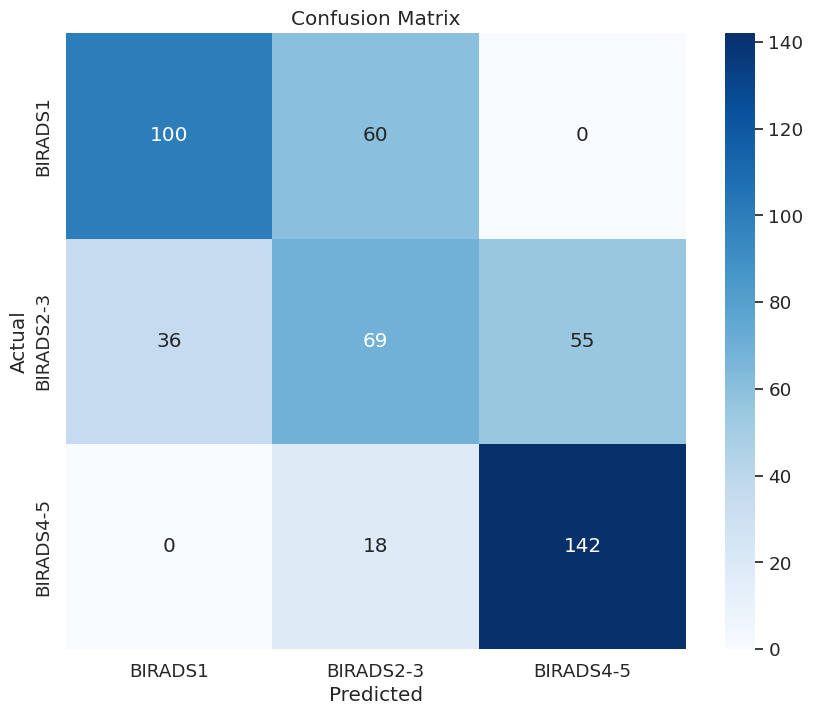

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
confusion_mtx = confusion_matrix(actuals, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', xticklabels=["BIRADS1","BIRADS2-3","BIRADS4-5"], yticklabels=["BIRADS1","BIRADS2-3","BIRADS4-5"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
